## Le WebScraping en étapes:

Pour les bibliothèques nécessaires pour les exemples ci-dessous, vous pouvez accéder à votre ligne de commande et les installer avec Conda install (si vous utilisez la distribution Anaconda) ou pip install pour les autres distributions Python.

1.) **Requests** : Ce module est utilisé pour visiter une URL et obtenir le contenu d'une page web.La bibliothèque "Requests" en Python est un outil populaire utilisé pour simplifier les opérations liées aux requêtes HTTP. Elle offre une interface simple et élégante pour envoyer des requêtes HTTP, gérer les cookies, les en-têtes, les sessions, et gérer d'autres aspects liés aux communications web. "Requests" permet aux développeurs d'interagir facilement avec des API, de récupérer des données à partir de sites web, et d'effectuer diverses opérations liées aux protocoles HTTP. Grâce à sa simplicité d'utilisation et à ses fonctionnalités puissantes, "Requests" est largement utilisée dans le domaine du web scraping, de l'automatisation web, et de l'accès aux services web.

Vous pouvez le télécharger avec pip install requests ou conda install requests (pour la distribution Anaconda de Python) dans votre invite de commande.

2.) **BeautifulSoup** :une bibliothèque Python qui facilite l'extraction d'informations à partir de documents HTML et XML. Elle offre des méthodes souples pour parcourir et rechercher des éléments dans le code source HTML/XML, facilitant ainsi l'analyse et la manipulation de données web.. 

Vous pouvez le télécharger avec pip install beautifulsoup4 ou conda install beautifulsoup4 (pour la distribution Anaconda de Python) dans votre invite de commande.

3.) **parser HTML** :Beautiful Soup prend en charge différents parseurs (analysateurs) pour analyser le code source HTML ou XML. Deux des parseurs populaires utilisés avec Beautiful Soup sont "lxml" et "html.parser"...

* lxml : "lxml" est un parseur externe qui est construit sur les bibliothèques C libxml2 et libxslt. Il est rapide, efficace et capable de gérer des documents HTML et XML complexes. "lxml" est souvent recommandé pour sa rapidité, en particulier lors du traitement de grandes quantités de données. 


* html.parser : "html.parser" est un parseur natif inclus dans la bibliothèque standard de Python. Il est plus lent que "lxml" mais peut être suffisant pour des tâches moins gourmandes en ressources. Aucune installation supplémentaire n'est nécessaire, car il fait partie de la bibliothèque standard. 


* html5lib : Il s'agit d'un parseur externe qui implémente l'algorithme de l'HTML Living Standard. Il est précis et capable de gérer des documents HTML mal formés, mais il est généralement plus lent que les autres parseurs.

## Application:

On considère le site: www.imdb.com

**1- Analyse du Site Web :**

On considère le site imdb et cette URL : https://www.imdb.com/title/tt0108778/episodes/ .inspectez la structure HTML pour comprendre comment les informations de la série ,ses épisodes et les différentes saisons sont présentées.
Identifiez les balises HTML, les classes et les IDs pertinents qui contiennent les données que vous souhaitez extraire.

**2-Extraction des Informations de Base :**

* 2.1- les épisodes de la saison 1:

Utilisez Beautiful Soup pour envoyer une requête HTTP à la page https://www.imdb.com/title/tt0108778/episodes/  récupérez le contenu HTML.
Récupérez la liste des episodes de la 1ere saison.
Récupérer pour chaque épisode , son numéro, son nom, la date de sortie, la note et la description
 
* 2.2-Récupérer toutes les saisons  

Etendre votre travail précédent pour extraire les les épisodes des 10 saisons de la série



In [57]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# L'url du site à scrapper
url = 'https://www.imdb.com/title/tt0108778/episodes/'

# ma requete HTTP avec un "GET" au serveur du site identifier dans l'url
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
response = requests.get(url, headers=headers)

# J'affiche l'url ainsi que le retour du serveur
print(url, response.status_code)


https://www.imdb.com/title/tt0108778/episodes/ 200


In [31]:
# Je demande à beautifulSoup de conserver dans une variable "soup" la page web à scrapper (un script html)
soup = BeautifulSoup(response.content,'html')# response.content  and response.text is same until i have media data on the page
#soup

In [32]:
soup.select_one('h2').text

'Friends'

In [40]:
all_tile = soup("div", class_= "sc-ccd6e31b-1 ggXjkj")
len(all_tile)

24

In [ ]:
# Example string
example_string = "S10.E1 ∙ The One After Joey and Rachel Kiss"


# Print the results
print(f"Season: {season}")
print(f"Episode: {episode}")
print(f"Title: {title}")


# Extracting data for the first page

In [124]:
all_tile = soup("div", class_= "sc-ccd6e31b-1 ggXjkj")
len(all_tile)
#for the first season:
episode_title_1 = []
for tile in all_tile:
    text = tile.find("div", class_= "ipc-title__text").text
    
    # Split the string by " ∙ " to separate the season/episode part from the title
    season_episode, title = text.split(" ∙ ")
    
    # Split the season/episode part by "." to separate season and episode
    season = season_episode.split(".")[0].strip()
    episode = season_episode.split(".")[1].strip()
    episode_title_1.append(title)
    
print(episode_title_1)
print(season)

['The One After Joey and Rachel Kiss', 'The One Where Ross Is Fine', "The One with Ross's Tan", 'The One with the Cake', "The One Where Rachel's Sister Babysits", "The One with Ross' Grant", 'The One with the Home Study', 'The One with the Late Thanksgiving', 'The One with the Birth Mother', 'The One Where Chandler Gets Caught', 'The One Where the Stripper Cries', "The One with Phoebe's Wedding", 'The One Where Joey Speaks French', 'The One with Princess Consuela', 'The One Where Estelle Dies', "The One with Rachel's Going Away Party", 'The Last One']
S10


# Function to iterate over all the pages

In [126]:
def extract_info(soup) :
    ep = []
    ss = []
    data = soup.find_all('div',{'class' : "sc-ccd6e31b-1 ggXjkj"})
    for sub_data in data :
    
        season, episode, release_date_episode, title, summary, min_rating, max_rating, number_of_review = None, None, None, None, None, None, None, None
        
        episode = sub_data.find('div',{'class' : 'ipc-title__text'}).text
        info_episode = episode.split("∙")
        title = info_episode[-1]
        season, episode = info_episode[0].split(".")
        
        release_date_episode = sub_data.find('span', {'class' : 'sc-ccd6e31b-10 dYquTu'}).text.replace(",","",1)
        summary = sub_data.find('div', {'class' : 'ipc-html-content ipc-html-content--base ipc-html-content--display-inline'}).text
        
        rating_data = sub_data.find('span', {'class' : 'ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating'}).text
        min_rating = float(rating_data.split("/")[0])
        max_rating = float(rating_data.split("/")[1].split("(")[0])
        number_of_review = rating_data.split("(")[-1][:-1]
        
        #formatage du nombre de review
        number_of_review = int(number_of_review.replace("K","000").replace("M","000000").replace(".",""))
        
        ep.append(title)
        ss.append({"saison" : season, "episode" : episode, "release_date_episode" : release_date_episode
                   ,"title" : title, "summary" : summary, "min_rating" : min_rating, "max_rating" : max_rating, "number_of_review" : number_of_review })
    return ss, ep

# Extract all the episodes with it's detail across seasons

In [128]:

# Main scraping loop
saisons = []

for id_saison in range(1, 11):
    url = f"https://www.imdb.com/title/tt0108778/episodes/?season={id_saison}"  # Replace with actual URL pattern
    res = requests.get(url, headers=headers)
    
    if res.status_code == 200:
        soup = BeautifulSoup(res.content,'html.parser')
        ss=[]
        ep = []
        ss,ep = extract_info(soup)
        #print(len(ss))
    
    
        print("saison",id_saison,len(ep),"episodes")
        print(ep)
    
        saisons.append(ss)
  
    else:
        print(f"Failed to retrieve data for season {id_saison}")

print(f"===> {len(saisons)} saisons")


saison 1 24 episodes
[' The One Where Monica Gets a Roommate', ' The One with the Sonogram at the End', ' The One with the Thumb', ' The One with George Stephanopoulos', ' The One with the East German Laundry Detergent', ' The One with the Butt', ' The One with the Blackout', ' The One Where Nana Dies Twice', ' The One Where Underdog Gets Away', ' The One with the Monkey', ' The One with Mrs. Bing', ' The One with the Dozen Lasagnas', ' The One with the Boobies', ' The One with the Candy Hearts', ' The One with the Stoned Guy', ' The One with Two Parts: Part 1', ' The One with Two Parts: Part 2', ' The One with All the Poker', ' The One Where the Monkey Gets Away', ' The One with the Evil Orthodontist', ' The One with the Fake Monica', ' The One with the Ick Factor', ' The One with the Birth', ' The One Where Rachel Finds Out']
saison 2 24 episodes
[" The One with Ross's New Girlfriend", ' The One with the Breast Milk', ' The One Where Heckles Dies', " The One with Phoebe's Husband", '

# Load it to a dataframe for data analysis

In [129]:
import pandas as pd

# Consolidate episode information from all seasons into a single list
all_episodes = []
for season in saisons:
    all_episodes.extend(season)

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(all_episodes)

# Display the first few rows of the DataFrame
df.head()


,saison,episode,release_date_episode,title,summary,min_rating,max_rating,number_of_review
0,S1,E1,"Mon Apr 15, 1996",The One Where Monica Gets a Roommate,"Monica and the gang introduce Rachel to the ""r...",8.1,10.0,10000
1,S1,E2,"Wed Sep 28, 1994",The One with the Sonogram at the End,Ross finds out his ex-wife is pregnant. Rachel...,7.9,10.0,8000
2,S1,E3,"Wed Oct 5, 1994",The One with the Thumb,Monica becomes irritated when everyone likes h...,8.0,10.0,76000
3,S1,E4,"Wed Oct 12, 1994",The One with George Stephanopoulos,Joey and Chandler take Ross to a hockey game t...,7.9,10.0,73000
4,S1,E5,"Wed Oct 19, 1994",The One with the East German Laundry Detergent,"Eager to spend time with Rachel, Ross pretends...",8.3,10.0,73000


# Data formatting and pre processing

In [131]:
# Convert 'release_date_episode' to datetime format
df['release_date_episode'] = pd.to_datetime(df['release_date_episode'])

# Extract year and month from release_date_episode for further analysis
df['year'] = df['release_date_episode'].dt.year
df['month'] = df['release_date_episode'].dt.month

# Convert 'saison' and 'episode' to numerical values if needed(eg: converts S1, E2 to 1,2 by using int(x[1:]) to the substring)
df['saison'] = df['saison'].apply(lambda x: int(x[1:]) if isinstance(x, str) else x)
df['episode'] = df['episode'].apply(lambda x: int(x[1:]) if isinstance(x, str) else x)

# Display basic information about the DataFrame after formatting
print(df.head())


   saison  episode release_date_episode  \
0       1        1           1996-04-15   
1       1        2           1994-09-28   
2       1        3           1994-10-05   
3       1        4           1994-10-12   
4       1        5           1994-10-19   

                                             title  \
0             The One Where Monica Gets a Roommate   
1             The One with the Sonogram at the End   
2                           The One with the Thumb   
3               The One with George Stephanopoulos   
4   The One with the East German Laundry Detergent   

                                             summary  min_rating  max_rating  \
0  Monica and the gang introduce Rachel to the "r...         8.1        10.0   
1  Ross finds out his ex-wife is pregnant. Rachel...         7.9        10.0   
2  Monica becomes irritated when everyone likes h...         8.0        10.0   
3  Joey and Chandler take Ross to a hockey game t...         7.9        10.0   
4  Eager to spen

In [132]:
df


,saison,episode,release_date_episode,title,summary,min_rating,max_rating,number_of_review,year,month
0,1,1,1996-04-15,The One Where Monica Gets a Roommate,"Monica and the gang introduce Rachel to the ""r...",8.1,10.0,10000,1996,4
1,1,2,1994-09-28,The One with the Sonogram at the End,Ross finds out his ex-wife is pregnant. Rachel...,7.9,10.0,8000,1994,9
2,1,3,1994-10-05,The One with the Thumb,Monica becomes irritated when everyone likes h...,8.0,10.0,76000,1994,10
3,1,4,1994-10-12,The One with George Stephanopoulos,Joey and Chandler take Ross to a hockey game t...,7.9,10.0,73000,1994,10
4,1,5,1994-10-19,The One with the East German Laundry Detergent,"Eager to spend time with Rachel, Ross pretends...",8.3,10.0,73000,1994,10
...,...,...,...,...,...,...,...,...,...,...
229,10,13,2004-02-18,The One Where Joey Speaks French,Phoebe tries to teach Joey to speak French for...,8.3,10.0,5000,2004,2
230,10,14,2004-02-25,The One with Princess Consuela,Phoebe ponders whether or not to changer her n...,8.4,10.0,48000,2004,2
231,10,15,2004-04-21,The One Where Estelle Dies,Ross tries to get Rachel to go back to Ralph L...,8.4,10.0,45000,2004,4
232,10,16,2004-04-28,The One with Rachel's Going Away Party,"The gang throws Rachel a goodbye party, during...",8.8,10.0,52000,2004,4


# Plots Included
 ## - Average rating per season - We see that average of the last season is higher than the rest
 ## - Number of episodes per season - Season 3 and 6 has maximum number of episodes
 ## - Episode ratings over time - Some shows may have seasonal peaks, often coinciding with significant holidays on the other hand Periods of lower ratings might occur during off-peak times or following less popular story arcs.
 ## - Distribution of episode ratings- We see a normal distribution curve i.e about 95% of ratings lies within two standard deviations considering mean as 8.25

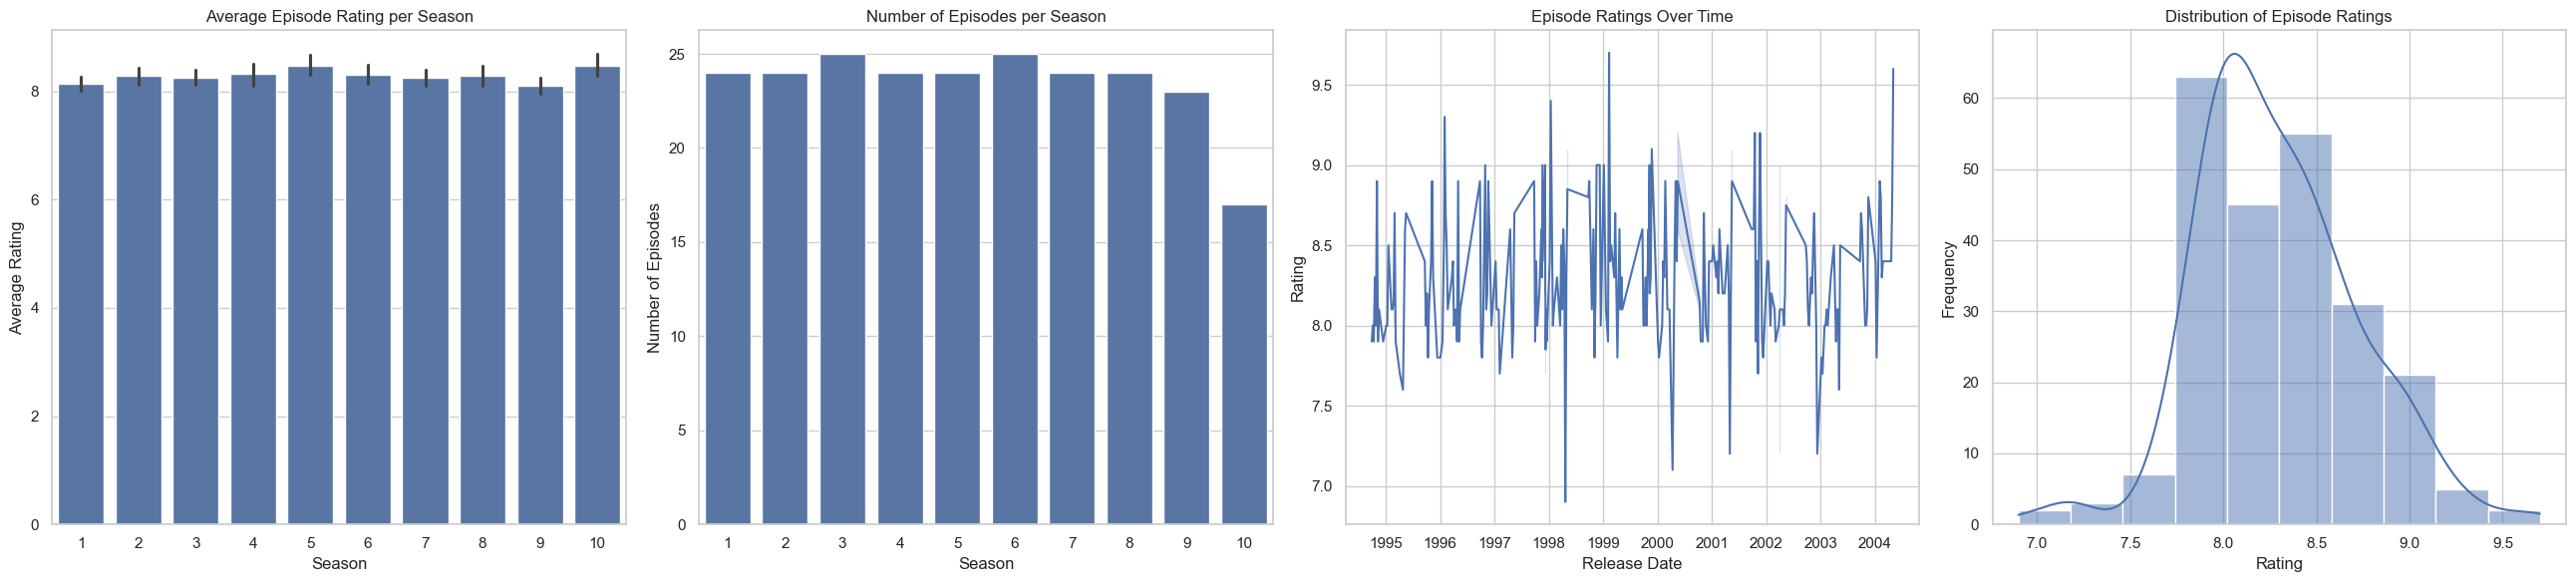

In [68]:
# Set plot style
sns.set(style="whitegrid")

# Create a figure and a grid of subplots (1 row, 4 columns)
fig, axes = plt.subplots(1, 4, figsize=(26, 6))

# Average rating per season
sns.barplot(x='saison', y='min_rating', data=df, ax=axes[0])
axes[0].set_title('Average Episode Rating per Season')
axes[0].set_xlabel('Season')
axes[0].set_ylabel('Average Rating')

# Number of episodes per season
sns.countplot(x='saison', data=df, ax=axes[1])
axes[1].set_title('Number of Episodes per Season')
axes[1].set_xlabel('Season')
axes[1].set_ylabel('Number of Episodes')

# Episode ratings over time
sns.lineplot(x='release_date_episode', y='min_rating', data=df, ax=axes[2])
axes[2].set_title('Episode Ratings Over Time')
axes[2].set_xlabel('Release Date')
axes[2].set_ylabel('Rating')

# Distribution of episode ratings
sns.histplot(df['min_rating'], bins=10, kde=True, ax=axes[3])
axes[3].set_title('Distribution of Episode Ratings')
axes[3].set_xlabel('Rating')
axes[3].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


# By plotting the correlation heat map we see that the features and not very corelated to each other.

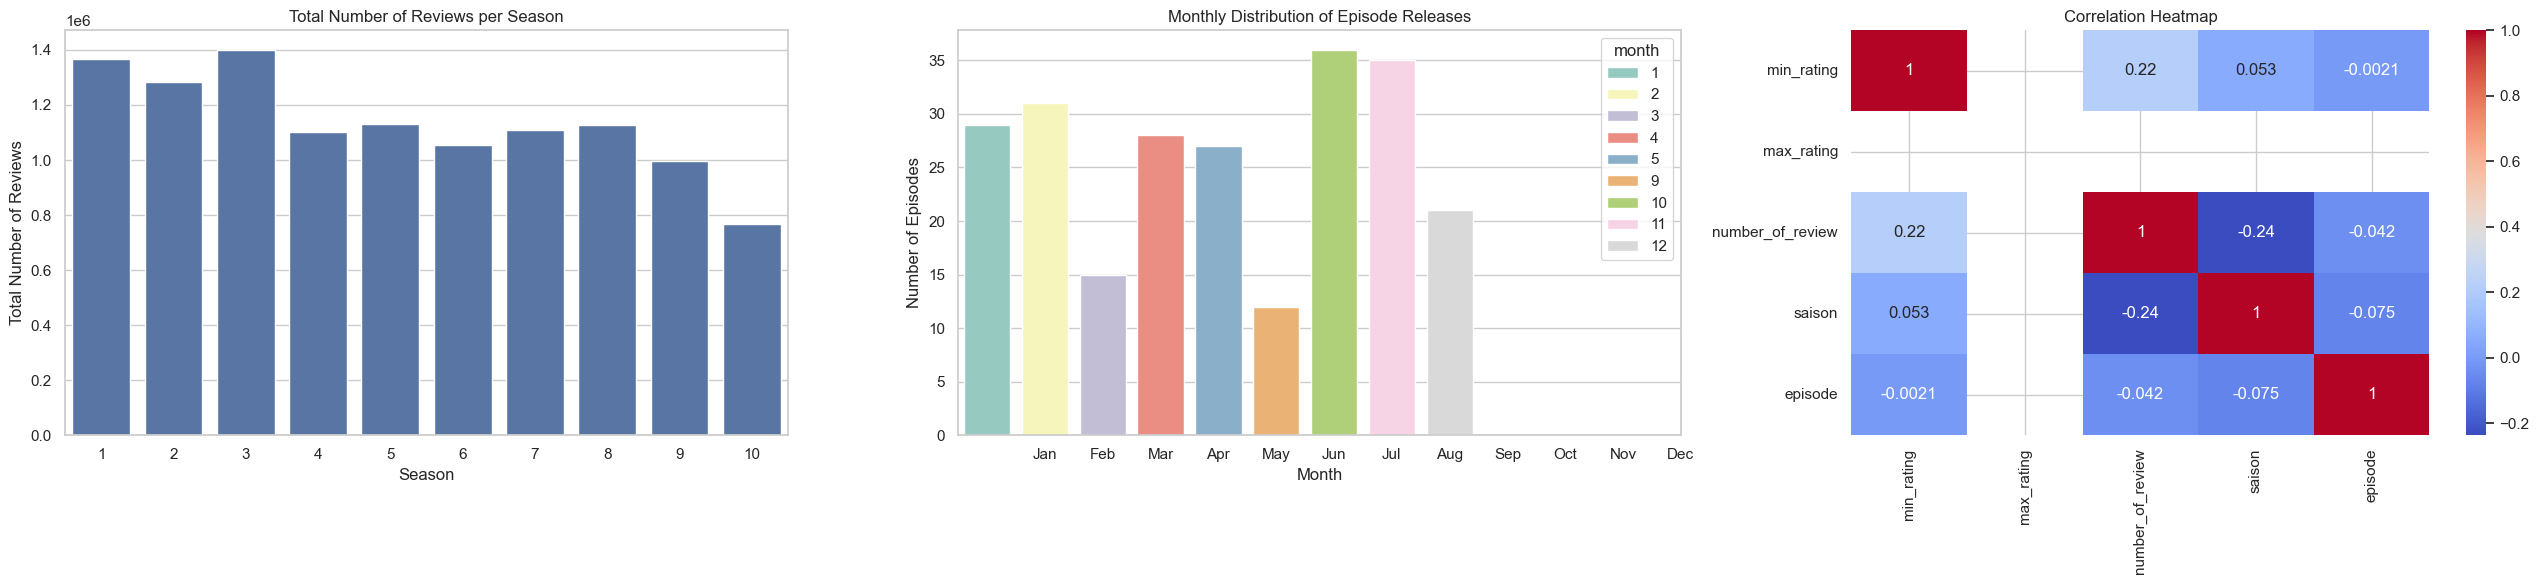

In [145]:

fig, axes = plt.subplots(1, 3, figsize=(26, 6))

# Number of reviews per season
reviews_per_season = df.groupby('saison')['number_of_review'].sum().reset_index()
sns.barplot(x='saison', y='number_of_review', data=reviews_per_season, ax=axes[0])
axes[0].set_title('Total Number of Reviews per Season')
axes[0].set_xlabel('Season')
axes[0].set_ylabel('Total Number of Reviews')

# Monthly distribution of episode releases
sns.countplot(x='month', data=df, ax=axes[1], hue = "month", palette="Set3")
axes[1].set_title('Monthly Distribution of Episode Releases')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Number of Episodes')
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Correlation heatmap
corr = df[['min_rating', 'max_rating', 'number_of_review', 'saison', 'episode']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", ax=axes[2])
axes[2].set_title('Correlation Heatmap')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

## Impact of Release Month on Episode Ratings
Objective: Analyze whether the month in which an episode was released impacts its rating. Check for patterns indicating higher or lower ratings in specific months.

## Create a box plot to compare ratings across different months for monthly impact analysis

C:\Users\bbode\AppData\Local\Temp\ipykernel_11164\1905426898.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


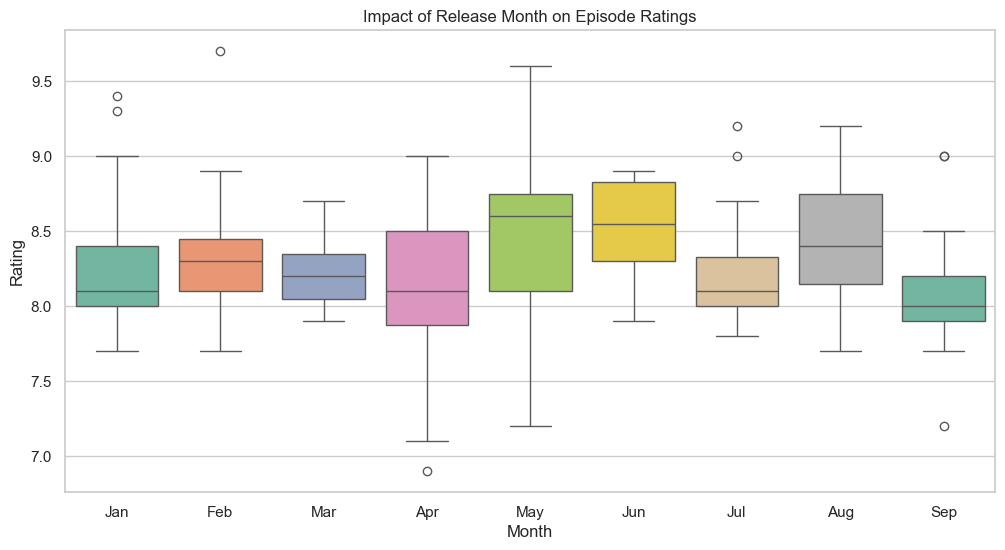

In [147]:

fig, ax = plt.subplots(figsize=(12, 6))

# Boxplot of ratings by month
sns.boxplot(x='month', y='min_rating', data=df,hue = "month", ax=ax, palette="Set2",legend = False)

# Set titles and labels
ax.set_title('Impact of Release Month on Episode Ratings')
ax.set_xlabel('Month')
ax.set_ylabel('Rating')
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Show the plot
plt.show()


# Check correlation between Rating and Number of Reviews

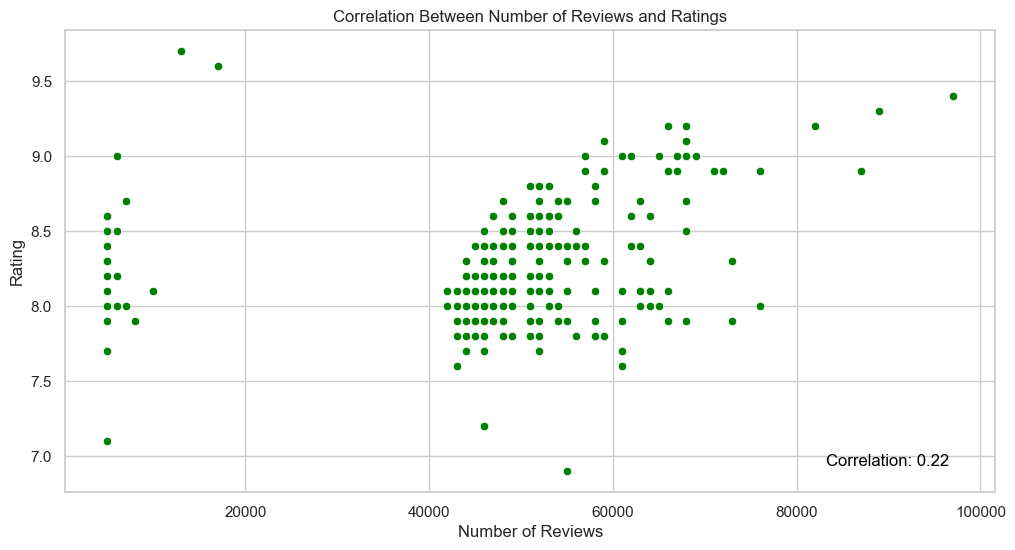

In [141]:
# Create a figure for the correlation analysis
fig, ax = plt.subplots(figsize=(12, 6))

# Scatter plot of ratings vs number of reviews
sns.scatterplot(x='number_of_review', y='min_rating', data=df, ax=ax, color='green')

# Compute and display the correlation coefficient
corr = df[['number_of_review', 'min_rating']].corr().iloc[0, 1]
ax.text(0.95, 0.05, f'Correlation: {corr:.2f}', horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes, fontsize=12, color='black')

# Set titles and labels
ax.set_title('Correlation Between Number of Reviews and Ratings')
ax.set_xlabel('Number of Reviews')
ax.set_ylabel('Rating')

# Show the plot
plt.show()


# Plotting top 10 highest rated episodes in F.R.I.E.N.D.S history according to IMDB

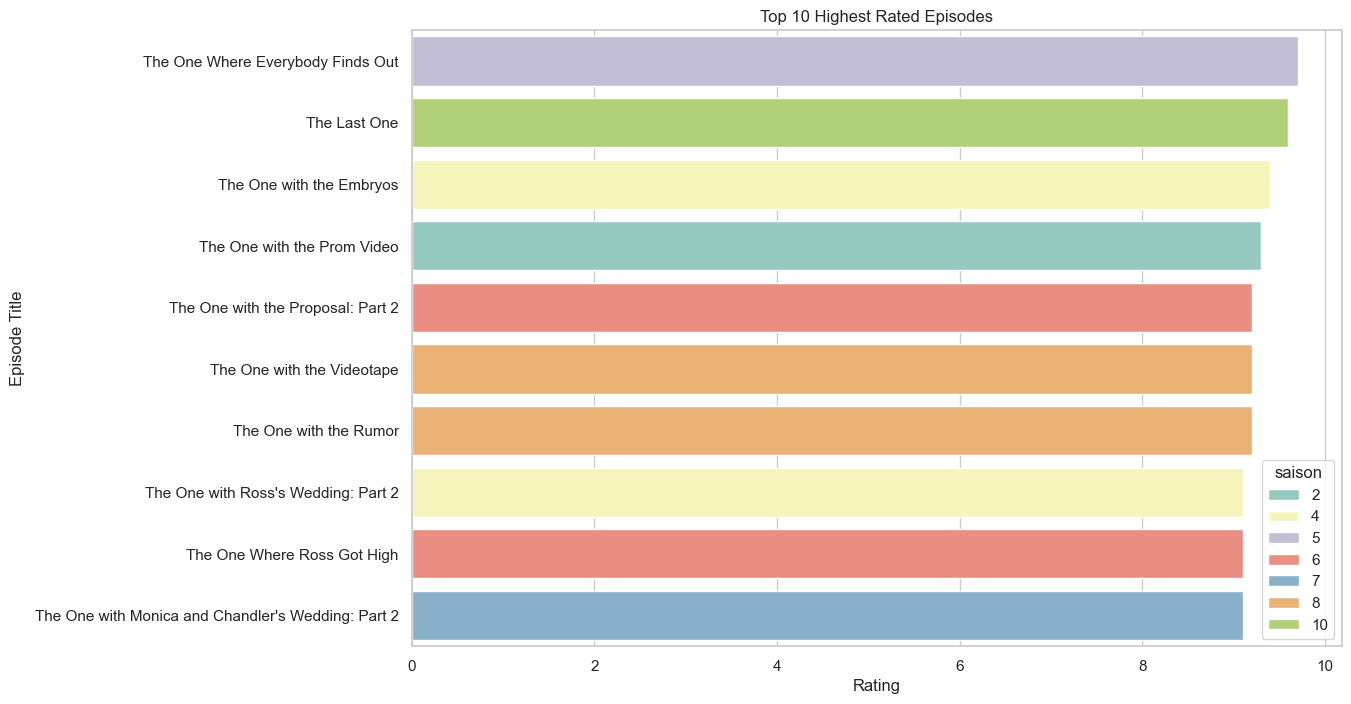

110                    The One Where Everybody Finds Out
233                                         The Last One
84                              The One with the Embryos
37                           The One with the Prom Video
145                    The One with the Proposal: Part 2
173                           The One with the Videotape
178                               The One with the Rumor
96                   The One with Ross's Wedding: Part 2
129                          The One Where Ross Got High
169     The One with Monica and Chandler's Wedding: P...
Name: title, dtype: object

In [151]:
# Identify top 10 highest-rated episodes
top_episodes = df.nlargest(10, 'min_rating')

# Create a figure for top episodes analysis
fig, ax = plt.subplots(figsize=(12, 8))

# Bar plot of top 10 highest-rated episodes
sns.barplot(x='min_rating', y='title', data=top_episodes, ax=ax, palette="Set3", orient='h',hue = "saison")

# Set titles and labels
ax.set_title('Top 10 Highest Rated Episodes')
ax.set_xlabel('Rating')
ax.set_ylabel('Episode Title')

# Show the plot
plt.show()

# Axis of analysis
## Common Themes in Top-Rated Episodes

Significant Life Events:

Many top-rated episodes revolve around key life events and milestones, such as weddings and major romantic developments. This suggests that episodes dealing with these significant moments tend to be more impactful and memorable.
     - "The One Where Everybody Finds Out" involves a major revelation and pivotal plot twist where the rest of the group discovers Monica and      Chandler's relationship.
     - "The Last One" is the series finale, which is a highly anticipated and emotional conclusion to the series.
    - "The One with the Embryos" features a memorable and competitive quiz between the friends that showcases their deep bond and humorous side.

Humor and Heartfelt Moments: 

Episodes with a mix of humor and heartfelt moments or emotional resolutions often rank higher in ratings. For instance, "The One with the Prom Video" combines nostalgia and emotional depth, leading to high viewer satisfaction.

## Conclusion : Les meilleurs épisodes coïncident souvent avec des arcs narratifs et des développements importants des personnages. Par exemple, les jalons de la relation entre Monica et Chandler sont très appréciés des fans, ce qui indique que les épisodes qui font progresser les intrigues clés des personnages sont très valorisés.

## Les épisodes qui impliquent des événements spéciaux, tels que des mariages et des révélations majeures, ou qui se terminent sur un cliffhanger ou un tournant majeur, ont tendance à obtenir de meilleures notes. Cela pourrait suggérer que les téléspectateurs apprécient les épisodes qui offrent une progression narrative substantielle ou un impact émotionnel important.

---

## Ressources utiles



https://www.crummy.com/software/BeautifulSoup/bs4/doc/

https://www.crummy.com/software/BeautifulSoup/bs4/doc/#css-selectors




# Deliverables
clean well-structured notebook with 2 solutions for scraping seasons of the series Friends (requests+ beautifulSoup / Selenium+BeautifulSoup / Selenium), an exploratory analysis of the retrieved data. storage in a consistent SQL database.
# Performance criteria
- scraping of episodes as expected, with all the details of the episodes and all the seasons - a global dataframe with all the seasons of the Friends series - an exploratory analysis with at least one axis of analysis. - a consistent SQL database

# Context of the project

1- Website Analysis:

Consider the imdb site and this URL: https://www.imdb.com/title/tt0108778/episodes/ . Inspect the HTML structure to understand how the information about the series, its episodes and the different seasons are presented. Identify the relevant HTML tags, classes and IDs that contain the data you want to extract.

2-Extraction of Basic Information:

2.1- episodes of season 1: * Retrieve the HTML content of the page https://www.imdb.com/title/tt0108778/episodes/. Then use BeautifulSoup to extract the episodes of the 1st season. Retrieve for each episode, its number, its name, the release date, the rating (the number of reviewers and the description as a bonus)

2.2-Retrieve all seasons Extend your previous work to extract episodes from all 10 seasons of the series, save the final result in a global dataframe.

​

3- carry out an exploratory analysis of the data recovered and propose at least one axis of analysis